In [216]:
import numpy as np
import matplotlib.pyplot as plt


In [217]:
#Params
W_P_des = .12
W_S_des = 150
V_cruise = 15
rho_cruise = 1.225
margin = 1.1
viscosity_cruise = 1.81e-5

#wing parameters
AR = 4
e = .7
sweep_angle = 0
T_C_ratio = .2
s = 3.5
c_r = .25 #root chord
C_MAC = .45


Calculate Clean infinite wing 

In [218]:
C_L_des = margin * (rho_cruise*V_cruise**2)/(2*W_S_des)
print("C_L_des: ", C_L_des)

C_L_des:  1.010625


Calculate lift coeff of airfoil

In [219]:
C_l_des = C_L_des/np.cos(sweep_angle)**2
print("C_l_des: ", C_l_des) 

C_l_des:  1.010625


Calculate Reynolds number

In [220]:
Re = rho_cruise*V_cruise*C_MAC/viscosity_cruise
print("Re: ", Re/10**6,"x 10^6")

Re:  0.4568370165745857 x 10^6


Use Xfoil for S1223 airfoil

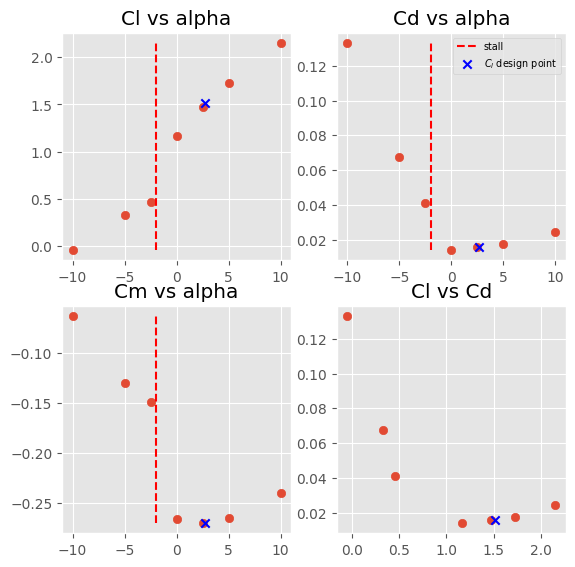

In [221]:
#data for S1223
"""alpha	Cl	CM	CD	L/D	Ncr
0	1.1683	-0.2666	0.01428	81.81	9
5	1.7284	-0.2653	0.01762	98.1	9
10	2.1516	-0.2402	0.02468	87.18	9
-5	0.3305	-0.1299	0.06744	4.9	9
-10	-0.0455	-0.0631	0.13293	-0.34	9
-2.5	0.4595	-0.1491	0.04098	11.21	9
2.5	1.47	-0.2704	0.01568	93.72	9
"""
#data for S1223
alpha = [0,5,10,-5,-10,-2.5,2.5]
Cl = [1.1683,1.7284,2.1516,0.3305,-0.0455,0.4595,1.47]
CD = [0.01428,0.01762,0.02468,0.06744,0.13293,0.04098,0.01568]
CM = [-0.2666,-0.2653,-0.2402,-0.1299,-0.0631,-0.1491,-0.2704]
L_D = [81.81,98.1,87.18,4.9,-0.34,11.21,93.72]

stall_alpha = -2
#plot all four in a 2x2 grid
plt.style.use('ggplot')
fig, axs = plt.subplots(2, 2, figsize=(6.5, 6.5))
axs[0, 0].scatter(alpha,Cl)
axs[0, 0].vlines(stall_alpha, min(Cl), max(Cl), colors='r', linestyles='dashed')
axs[0, 0].scatter(2.7,1.515, color='b', marker='x', label='$C_l$ design point')
axs[0, 0].set_title('Cl vs alpha')
axs[0, 1].scatter(alpha,CD)
axs[0, 1].vlines(stall_alpha, min(CD), max(CD), colors='r', linestyles='dashed', label='stall')
axs[0, 1].scatter(2.7,0.016, color='b', marker='x', label='$C_l$ design point')
axs[0,1].legend(fontsize='x-small')
axs[0, 1].set_title('Cd vs alpha')
axs[1, 0].scatter(alpha,CM)
axs[1, 0].vlines(stall_alpha, min(CM), max(CM), colors='r', linestyles='dashed')
axs[1, 0].scatter(2.7,-0.2704, color='b', marker='x')
axs[1, 0].set_title('Cm vs alpha')
axs[1, 1].scatter(Cl,CD)
axs[1, 1].scatter(1.515,0.016, color='b', marker='x')
axs[1, 1].set_title('Cl vs Cd')
plt.tight_layout
plt.show()




In [222]:
#calculate wingspan
b = np.sqrt(AR*s)
print("Wingspan: ", b, "m")

taper_ratio = .4
c_t = c_r*taper_ratio
print("Tip chord: ", c_t, "m")

#mean aerodynamic chord
MAC = 2/3*c_r*(1+taper_ratio+taper_ratio**2)/(1+taper_ratio)
print("MAC: ", MAC, "m")

#mach number at cruise
Mcruise = .0441
print("Mach number at cruise: ", Mcruise)
#pitch up tendency
lam_x_c = Mcruise * np.tan(.25*((2*c_r)/b)*(1-taper_ratio))
lam_x_c = lam_x_c * 180/np.pi
print("Pitch up tendency: ", lam_x_c)

#tr thickness at root
t_r = T_C_ratio*c_r
#cantilever ratio
R_c = (b/2)/(t_r)
print("Root thickness: ", t_r, "m")

beta_cruise = np.sqrt(1-Mcruise**2)
print("Beta cruise: ", beta_cruise)
half_cos_sweep = np.cos(sweep_angle)
dCl_dalpha = (2*np.pi*AR)/(2+np.sqrt(4+(AR*beta_cruise/.95)**2))
print("dCl_dalpha: ", dCl_dalpha)
dCL_dalpha_deg = dCl_dalpha/180/np.pi
print("dCL_dalpha: degrees  ", dCL_dalpha_deg)
#infwing cl/alpha
dCL_dalpha_inf = 2*np.pi
print("dCL_dalpha_inf: ", dCL_dalpha_inf)
#alpha for zero lift
alpha_zero_lift = -10 * np.pi/180
#trim angle of attack
alpha_trim = (C_l_des/dCl_dalpha) + alpha_zero_lift
print("Alpha trim: ", alpha_trim *(180/np.pi))

#stall angle 
stall = 4/()



Wingspan:  3.7416573867739413 m
Tip chord:  0.1 m
MAC:  0.18571428571428572 m
Mach number at cruise:  0.0441
Pitch up tendency:  0.05065433722738452
Root thickness:  0.05 m
Beta cruise:  0.9990271217539591
dCl_dalpha:  3.7749956082813565
dCL_dalpha: degrees   0.006675657902313045
dCL_dalpha_inf:  6.283185307179586
Alpha trim:  5.338970737709295
